In [1]:
import sys
from pathlib import Path

PROJ_ROOT = Path('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('/home/benr/src/ssm-analysis/input_files')
import ssm_read_fwinputs
import ssm_write_fwinputs
import ssm_adjust_rivers

In [2]:
start_date = pd.Timestamp('2014-01-01')
with open(PROJ_ROOT / '2014_Exist_ssm_pnt_wq.dat') as f:
    with open(PROJ_ROOT / '2014_ssm_riv.dat') as r:
        dfs_oneyr, *junk = ssm_read_fwinputs.read_merge_dats(r, f, start_date)
dfs_oneyr['data'] = ssm_write_fwinputs.convert_dates(dfs_oneyr['data'], start_date)
dfs_oneyr['data']

,,,discharge,temp,salt,tss,alg1,alg2,alg3,zoo1,zoo2,ldoc,...,pip,cod,doxg,psi,dsi,alg1p,alg2p,alg3p,dic,talk
Hours,Node,FVCOM ID,,,,,,,,,,,,,,,,,,,,,
0.0,12521,466,79.130000,3.73,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24.0,12521,466,79.970000,3.73,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48.0,12521,466,79.730000,3.73,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72.0,12521,466,80.450000,3.73,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96.0,12521,466,79.610000,3.73,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8664.0,1623,601,0.000792,10.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.071,...,0.0,0.0,5.9,0.0,0.0,0.0,0.0,0.0,2649.0,2000.0
8688.0,1623,601,0.000792,10.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.071,...,0.0,0.0,5.9,0.0,0.0,0.0,0.0,0.0,2649.0,2000.0
8712.0,1623,601,0.000792,10.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.071,...,0.0,0.0,5.9,0.0,0.0,0.0,0.0,0.0,2649.0,2000.0


Update the nitrogen constituents of point sources to uniform values

In [3]:
ptsrc_idx = dfs_oneyr['data'].merge(dfs_oneyr['nodes']['Source Type'], left_on=('Node','FVCOM ID'), right_index=True)['Source Type'] == 'Point Source'
river_idx = dfs_oneyr['data'].merge(dfs_oneyr['nodes']['Source Type'], left_on=('Node','FVCOM ID'), right_index=True)['Source Type'] == 'River'
dfs_oneyr['data'].loc[ptsrc_idx, ['nh4','no32','ldon','rdon','lpon','rpon']] = [22.63, 2.99, 2.04, 0, 1.7, 0]
dfs_oneyr['data'][['nh4','no32','ldon','rdon','lpon','rpon']]

,,,nh4,no32,ldon,rdon,lpon,rpon
Hours,Node,FVCOM ID,,,,,,
0.0,12521,466,NaN,NaN,NaN,NaN,NaN,NaN
24.0,12521,466,NaN,NaN,NaN,NaN,NaN,NaN
48.0,12521,466,NaN,NaN,NaN,NaN,NaN,NaN
72.0,12521,466,NaN,NaN,NaN,NaN,NaN,NaN
96.0,12521,466,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
8664.0,1623,601,22.63,2.99,2.04,0.0,1.7,0.0
8688.0,1623,601,22.63,2.99,2.04,0.0,1.7,0.0
8712.0,1623,601,22.63,2.99,2.04,0.0,1.7,0.0


Write the result to a new file

In [4]:
with open(PROJ_ROOT / 'data' / '2014_exist_ptuniform_ssm_pnt_wq.dat', 'w') as f:
    ssm_write_fwinputs.write_dat_file(f, ssm_write_fwinputs.get_icm_data_only(dfs_oneyr), 'point', 'calculated', hdr_comment='29.36mg/L TN')

Repeat with the 10-year looped input file

In [5]:
with open(PROJ_ROOT / '2014_Exist_10_looped_ssm_pnt_wq.dat') as f:
    dfs_tenyr, *junk = ssm_read_fwinputs.read_dat_file(f, start_date)
dfs_tenyr['data'] = ssm_write_fwinputs.convert_dates(dfs_tenyr['data'], start_date)
ptsrc_idx_10 = dfs_tenyr['data'].merge(dfs_tenyr['nodes']['Source Type'], left_on=('Node','FVCOM ID'), right_index=True)['Source Type'] == 'Point Source'
river_idx_10 = dfs_tenyr['data'].merge(dfs_tenyr['nodes']['Source Type'], left_on=('Node','FVCOM ID'), right_index=True)['Source Type'] == 'River'

In [6]:
dfs_tenyr['data'].loc[ptsrc_idx_10, ['nh4','no32','ldon','rdon','lpon','rpon']] = [22.63, 2.99, 2.04, 0, 1.7, 0]

In [7]:
with open(PROJ_ROOT / 'data' / '2014_exist_10_looped_ptuniform_ssm_pnt_wq.dat', 'w') as f:
    ssm_write_fwinputs.write_dat_file(f, dfs_tenyr, 'point', 'calculated', hdr_comment='29.36mg/L TN')

Now normalize all the rivers to the median discharge scenario

In [8]:
adjustments = pd.read_excel('stream_multipliers_simplemedian_2014.xlsx', sheet_name='q=0.5', index_col=0)
adjustments = ssm_write_fwinputs.convert_dates(adjustments)

rivers = dfs_oneyr['nodes'].loc[dfs_oneyr['nodes']['Source Type'] == 'River', 'Name']

def do_river_adjust(df, adj):
    first = True
    for nf,name in rivers.items():
        selector = (df.index.get_level_values(1) == nf[0]) & (df.index.get_level_values(2) == nf[1])
        if (selector * 1).sum() == 0:
            continue
        years_index = (df.index.get_level_values(0) / 8760).astype(int)
        for year,group in df.groupby(years_index):
            adj_limit = adj.loc[np.isin(adj.index, (group.index.get_level_values(0) % 8760).astype(int).drop_duplicates())].to_numpy()
            df.loc[selector & (years_index == year), 'discharge'] *= adj_limit

df_test = dfs_oneyr['data'].copy()
do_river_adjust(df_test, adjustments['Rain-dominated'])
df_test.head()

,,,discharge,temp,salt,tss,alg1,alg2,alg3,zoo1,zoo2,ldoc,...,pip,cod,doxg,psi,dsi,alg1p,alg2p,alg3p,dic,talk
Hours,Node,FVCOM ID,,,,,,,,,,,,,,,,,,,,,
0.0,12521,466,75.739721,3.73,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24.0,12521,466,77.413612,3.73,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48.0,12521,466,78.048553,3.73,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72.0,12521,466,79.628470,3.73,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96.0,12521,466,79.663012,3.73,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


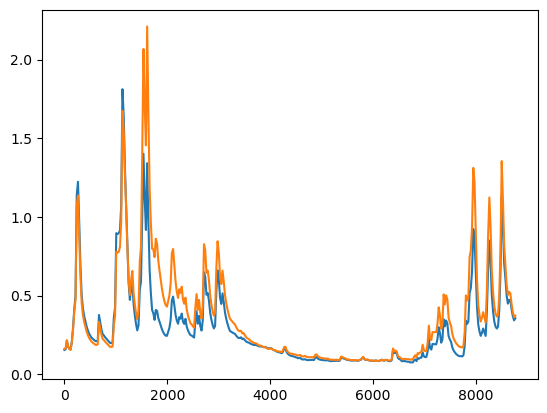

In [9]:
fig, ax = plt.subplots()

ax.plot(df_test.xs((15634, 301), level=(1,2))['discharge'])
ax.plot(dfs_oneyr['data'].xs((15634,301),level=(1,2))['discharge'])

Test the code for ten years

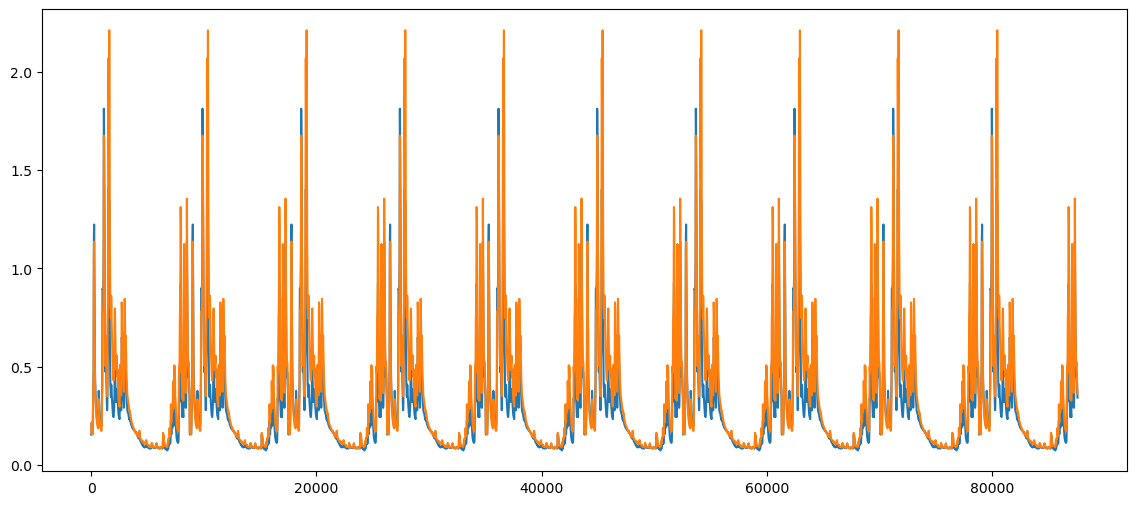

In [10]:
df_test_ten = dfs_tenyr['data'].copy()
do_river_adjust(df_test_ten, adjustments['Rain-dominated'])

fig, ax = plt.subplots(figsize=(14,6))

ax.plot(df_test_ten.xs((15634, 301), level=(1,2))['discharge'])
ax.plot(dfs_tenyr['data'].xs((15634,301),level=(1,2))['discharge'])

In [11]:
do_river_adjust(dfs_oneyr['data'], adjustments['Rain-dominated'])
do_river_adjust(dfs_tenyr['data'], adjustments['Rain-dominated'])

Now repeat for each of the other discharge scenarios

In [12]:
names = ['q0.1', 'q0.3', 'q0.5', 'q0.7', 'q0.9']
qmults = [0.79, 0.94, 1, 1.08, 1.22]
qmult_ser = pd.Series(qmults, index=names)

tns = [29.36, 25, 20, 15, 10, 4.54]
[22.63, 2.99, 2.04, 0, 1.7, 0]
nh4s = [22.63, 18.96, 14.74, 10.52,  6.31,  1.7 ]
no3s = [ 2.99,  2.69,  2.34,  1.99,  1.65,  1.3 ]
ldon = [ 2.04,  1.72,  1.35,  0.97,  0.60,  0.2 ]
rdon = [ 0   ,  0.09,  0.2 ,  0.31,  0.41,  0.53]
lpon = [ 1.7 ,  1.44,  1.14,  0.85,  0.55,  0.23]
rpon = [ 0   ,  0.11,  0.23,  0.35,  0.48,  0.61]
conc_df = pd.DataFrame({'nh4': nh4s, 'no32': no3s, 'ldon': ldon, 'rdon': rdon, 'lpon': lpon, 'rpon': rpon},
                       index=tns)
conc_df

,nh4,no32,ldon,rdon,lpon,rpon
29.36,22.63,2.99,2.04,0.00,1.70,0.00
25.00,18.96,2.69,1.72,0.09,1.44,0.11
20.00,14.74,2.34,1.35,0.20,1.14,0.23
15.00,10.52,1.99,0.97,0.31,0.85,0.35
10.00,6.31,1.65,0.60,0.41,0.55,0.48
4.54,1.70,1.30,0.20,0.53,0.23,0.61


In [13]:
for q, mult in qmult_ser.items():
    print(q)
    dfs_copy_1yr = {
        'nodes': dfs_oneyr['nodes'],
        'vqdist': dfs_oneyr['vqdist'],
        'data': dfs_oneyr['data'].copy(),
        'version': dfs_oneyr['version']
    }
    dfs_copy_10yr = {
        'nodes': dfs_tenyr['nodes'],
        'vqdist': dfs_tenyr['vqdist'],
        'data': dfs_tenyr['data'].copy(),
        'version': dfs_oneyr['version']
    }
    dfs_copy_1yr['data'].loc[river_idx, 'discharge'] *= mult
    # Write the new river file (one 1-year needed)
    with open(PROJ_ROOT / 'data' / f'2014_{q}_ssm_riv.dat', 'w') as f:
        ssm_write_fwinputs.write_dat_file(f, dfs_copy_1yr, 'node', 'calculated',
                                          num_statevars=3, hdr_comment=f'q={q}')
    dfs_copy_10yr['data'].loc[river_idx_10, 'discharge'] *= mult
    # Write a 1-year WQM file and a 10-year WQM file for each concentration profile
    for tn, row in conc_df.iterrows():
        print(f'   {tn}mg/L')
        dfs_copy_1yr['data'].loc[ptsrc_idx, conc_df.columns] = row.to_numpy()
        dfs_copy_10yr['data'].loc[ptsrc_idx_10, conc_df.columns] = row.to_numpy()
        comment = f'q={q}, {tn}mg/L TN'
        with open(PROJ_ROOT / 'data' / f'2014_{q}_{tn}mgtn_ssm_pnt_wq.dat', 'w') as f:
            ssm_write_fwinputs.write_dat_file(f, ssm_write_fwinputs.get_icm_data_only(dfs_copy_1yr), 'point', 'calculated', hdr_comment=comment)
        with open(PROJ_ROOT / 'data' / f'2014_10_looped_{q}_{tn}mgtn_ssm_pnt_wq.dat', 'w') as f:
            ssm_write_fwinputs.write_dat_file(f, dfs_copy_10yr, 'point', 'calculated', hdr_comment=comment)

q0.1
   29.36mg/L
   25.0mg/L
   20.0mg/L
   15.0mg/L
   10.0mg/L
   4.54mg/L
q0.3
   29.36mg/L
   25.0mg/L
   20.0mg/L
   15.0mg/L
   10.0mg/L
   4.54mg/L
q0.5
   29.36mg/L
   25.0mg/L
   20.0mg/L
   15.0mg/L
   10.0mg/L
   4.54mg/L
q0.7
   29.36mg/L
   25.0mg/L
   20.0mg/L
   15.0mg/L
   10.0mg/L
   4.54mg/L
q0.9
   29.36mg/L
   25.0mg/L
   20.0mg/L
   15.0mg/L
   10.0mg/L
   4.54mg/L
